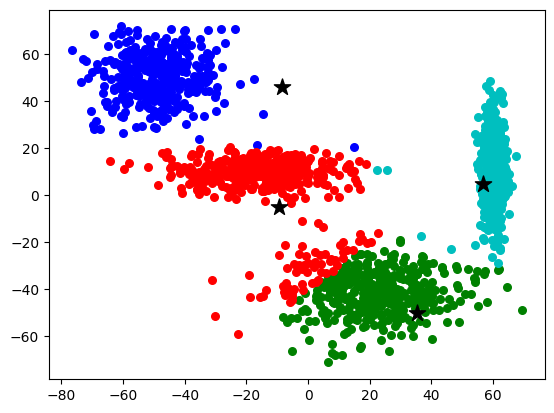

Centers:  [[-8.489557597524898, 45.95825827155481], [35.278215363780795, -50.27841122756096], [-9.462524104785137, -5.2174866695084905], [56.86709977310077, 4.6796210850020135]]
Inertia:  1222056.6151490249


In [ ]:
import csv
import random
import math

# Load dataset into 2D list "Data"
data_file = "/content/drive/MyDrive/dataset/g_data.csv"
Data = []
with open(data_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        Data.append([float(val) for val in row])

# Set the value of K and randomly select K different data points from “Data” as initial centers
K = 4
Centers = random.sample(Data, K)

# Initialize a 2D list named "Clusters" which contains K 1D lists for the K centers
Clusters = [[] for i in range(K)]

# Assign data points to the closest center
def assign_clusters(Data, Centers, Clusters):
    for S in Data:
        min_dist = math.inf
        for i in range(K):
            dist = math.dist(S, Centers[i])
            if dist < min_dist:
                min_dist = dist
                min_index = i
        Clusters[min_index].append(S)

# Update centers to be the average of the data points in each cluster
def update_centers(Centers, Clusters):
    for i in range(K):
        if Clusters[i]:
            Centers[i] = [sum(val)/len(Clusters[i]) for val in zip(*Clusters[i])]

# Perform k-means clustering
itr = 1
shift = math.inf
while shift > 50:
    assign_clusters(Data, Centers, Clusters)
    update_centers(Centers, Clusters)
    # Calculate the total shift distance
    temp_clusters = [[] for i in range(K)]
    for S in Data:
        min_dist = math.inf
        min_index = -1
        for i in range(K):
            dist = math.dist(S, Centers[i])
            if dist < min_dist:
                min_dist = dist
                min_index = i
        temp_clusters[min_index].append(S)
        if min_index != Clusters.index([C for C in Clusters if S in C][0]):
            shift += 1
    Clusters = temp_clusters
    if itr > 1 and shift <= 50:
        break
    shift = 0
    itr += 1

# Calculate the inertia
inertia = 0
for i in range(K):
    inertia += sum([(math.dist(S, Centers[i]))**2 for S in Clusters[i]])

# Plot the clusters with different colors
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(K):
    plt.scatter([S[0] for S in Clusters[i]], [S[1] for S in Clusters[i]], s=30, c=colors[i%7])
plt.scatter([C[0] for C in Centers], [C[1] for C in Centers], s=150, marker='*', c='k')
plt.show()

print("Centers: ", Centers)
print("Inertia: ", inertia)
